# Principal Component Analysis
> A tutorial on PCA

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/pca.png

## Introduction

PCA forms the basis for any ML enthusiasits. It helps in reducing the number of features by keeping almost all the data within its components

Put simply, PCA involves making a coordinate transformation (i.e. rotation) from the arbitrary axes (or "features")
you started with to set of axes 'aligned with the data itself,' and doing this almost always means that you can get 
rid of few of these "components" of data that have small variance without suffering much in the way of accuracy while 
saving tons of computation

### what we'll learn

We'll define the following terms as we go, but here's the process in a nutshell:

Covariance: Find the covariance matrix for your dataset <br>
Eigenvectors: Find the eigenvectors of that matrix (these are the "components" btw) <br>
Ordering: Sort the eigenvectors/'dimensions' from biggest to smallest variance <br>
Projection / Data reduction: Use the eigenvectors corresponding to the largest variance to project the dataset into a reduced- dimensional space <br>
(Check: How much did we lose by that truncation?)<br>

#### Covariance

If you got two data dimensions, and they vary together, then they are co-variant

### STEP BY STEP EXPLANATION OF PCA

##### STEP 1: STANDARDIZATION

standardization is one of the important step before doing PCA or any ML problem. There could be columns whose values could be in range of 0 to 1 or 100 to 1000. so that the domination of features whose range is 100 to 1000 is more compared to 0 to 1. 

The standardization is done using the below formula.

Mathematically it is done by subtracting the mean and dividing by the standard deviation for each feature.


\begin{equation*}
z = \frac{value - mean}{standard deviation}
\end{equation*}

Once the standardization is done, all the variables will be transformed to the same scale.

#### STEP 2: COVARIANCE MATRIX COMPUTATION

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:

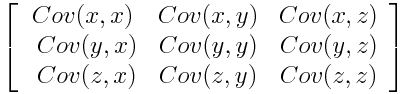

In [3]:
from IPython.display import Image
Image(filename="C:/Users/srmetlakunta/Desktop/PrincipalComponentAnalysiCovarianceMatrix.png")

Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?

It’s actually the sign of the covariance that matters :

. if positive then : the two variables increase or decrease together (correlated) <br>
. if negative then : One increases when the other decreases (Inversely correlated) 


Now, that we know that the covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables, let’s move to the next step

### STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible

### Step 4: HOW PCA CONSTRUCTS THE PRINCIPAL COMPONENTS?

The First Principal Component has the largest variance of the data. It projects most of the data points on its line. Second Principal Component is uncorelated to the first principal and perpendicular to it also and it accounts for the next highest variance and this continues. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin). This continues until a total of p principal components have been calculated, equal to the original number of variables

Now that we understood what we mean by principal components, let’s go back to eigenvectors and eigenvalues. What you firstly need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

Without further ado, it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

#### Example:

let’s suppose that our data set is 2-dimensional with 2 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:

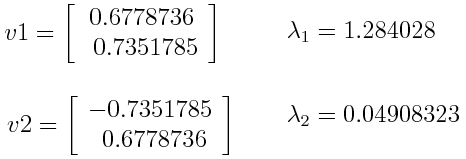

In [4]:
Image(filename="C:/Users/srmetlakunta/Desktop/eigen_vectors.png")

If we rank the eigenvalues in descending order, we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component (PC1) is v1 and the one that corresponds to the second component (PC2) isv2.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 96% and 4% of the variance of the data.

### Step 5: Feature Vector

In this step we choose to keep all or some of the principal components. Generally we discard low eigen values components to create a reduced matrix of input called Feature Vector. This we call as dimensionality reduced matrix and the technique is called dimensionality reduction technique

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions

To form the principal components for compuation, we take the transpose of the feature vector and left-multiply it with the transpose of scaled version of original dataset.

NewData = FeatureVector^T x ScaledData^T

Here,

NewData is the Matrix consisting of the principal components,

FeatureVector is the matrix we formed using the eigenvectors we chose to keep, and

ScaledData is the scaled version of original dataset

(‘T’ in the superscript denotes transpose of a matrix which is formed by interchanging the rows to columns and vice versa. In particular, a 2x3 matrix has a transpose of size 3x2)

References :- 
1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis
2. https://drscotthawley.github.io/PCA-From-Scratch/
3. https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial